## Lancement des librairies et DF

In [ ]:
#@title
!pip install pycountry

     |████████████████████████████████| 10.1 MB 15.0 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=fc43d4271c47be5b650f4d817af0bc45ff172892a6ed1617cda6d5789e4c8c78
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
#@title
! pip install dataprep

     |████████████████████████████████| 3.5 MB 14.8 MB/s 
     |████████████████████████████████| 848 kB 72.3 MB/s 
     |████████████████████████████████| 158 kB 71.2 MB/s 
     |████████████████████████████████| 943 kB 48.1 MB/s 
     |████████████████████████████████| 10.9 MB 52.4 MB/s 
     |████████████████████████████████| 366 kB 63.8 MB/s 
     |████████████████████████████████| 1.5 MB 64.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 7.2 MB/s 
     |████████████████████████████████| 719 kB 66.1 MB/s 
     |████████████████████████████████| 94 kB 178 kB/s 
     |████████████████████████████████| 144 kB 61.5 MB/s 
     |████████████████████████████████| 271 kB 57.7 MB/s 
     |████████████████████████████████| 133 kB 53.1 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 1.5 MB 55.5 MB/s 
     |████████████████████████████████| 1.5 MB 16.1 MB/s 
     |██████████████

In [ ]:
#@title
!pip install dataprep

In [ ]:
#@title
!pip install raceplotly

In [ ]:
#@title
# import librairies
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from dataprep.clean import clean_country
from raceplotly.plots import barplot

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title
#YANN 
# import des DF

db_all = pd.read_csv("/content/drive/MyDrive/Projet-recommendations-Movies/imdb_final_all_prepared.csv")
db_europe = pd.read_csv('/content/drive/MyDrive/Projet-recommendations-Movies/db_europe.csv')

# ETAT ACTUEL DU CINEMA / VISUALISATIONS



## Repartition des films par pays de production

In [53]:
#@title
masknneuro = db_all['european_countries']== 0
db_nn_euro = db_all[masknneuro]

In [54]:
# SCRIPT
#@title
# Number of productions film per country in world

# Drop the 'None' values, and select the country names
#d_country = db_all[~db_all.loc[:,'countries'].str.contains('None')]['countries']
d_country = db_all.loc[:,'countries']

# Conversion on ISO-code of country names
df=pd.DataFrame({'country': d_country.values})
dcountry2 = clean_country(df, 'country', output_format='alpha-3')


# Group the number of films by country
country_counts = dcountry2.country_clean.value_counts()

#Top 20
country_names = country_counts.index[:20]
counts = country_counts[:20]

country_counts.index.name = 'country'
count = country_counts.reset_index()

Country Cleaning Report:
	207791 values cleaned (88.86%)
	26052 values unable to be parsed (11.14%), set to NaN
Result contains 207791 (88.86%) values in the correct format and 26052 null values (11.14%)


In [ ]:
#@title
# GRAPH

df = px.data.gapminder()

fig = px.scatter_geo(count, locations="country", color="country", size="country_clean",
                     projection="natural earth", size_max=30)
fig.update_layout(showlegend=False)
fig.update_layout(title={'text': "Repartition du nombre de films par pays de production",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 

fig.show()

## EVOLUTION DU NOMBRE DE PRODUCTIONS AU COURS DES ANNEES

In [ ]:
#@title
# Script to group by decade and count the number of movies  

df_decade = pd.DataFrame(columns = ['decade', 'movie_number'])

for i in range(1900, 2030, 10):
    mask = (db_all['startYear'] >= i) & (db_all['startYear'] < i+10)
    movie_number = db_all[mask]['tconst']
    movie_number = len(movie_number)
    df_decade = df_decade.append({'decade': i, 'movie_number': movie_number}, 
                           ignore_index=True)                 
    

df_decade_euro = pd.DataFrame(columns = ['decade', 'movie_number'])

for i in range(1900, 2030, 10):
    mask = (db_europe['startYear'] >= i) & (db_europe['startYear'] < i+10)
    movie_number = db_europe[mask]['tconst']
    movie_number = len(movie_number)
    df_decade_euro = df_decade_euro.append({'decade': i, 'movie_number': movie_number}, 
                           ignore_index=True)                  

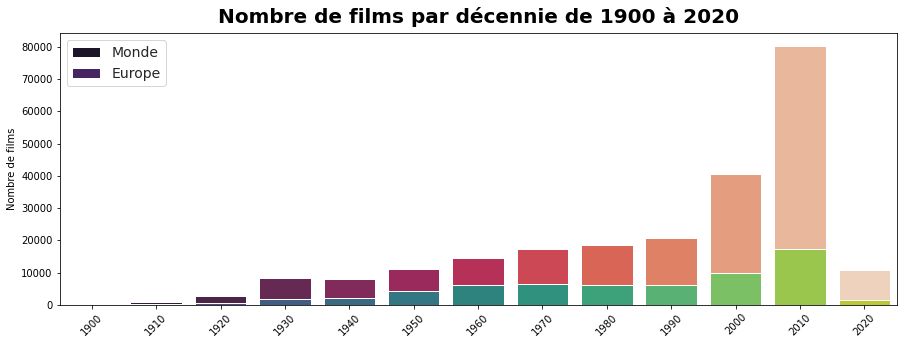

In [ ]:
#@title
#VIZ of the number of films per decade 


## Changer  axe X et Y changer crest par viridis

plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")

movie_decade = sns.barplot(x= df_decade['decade'], y= df_decade['movie_number'],palette='rocket',label="Monde")
movie_decade = sns.barplot(x= df_decade_euro['decade'], y= df_decade_euro['movie_number'],palette='viridis',label="Europe")
movie_decade.set_xticklabels(movie_decade.get_xticklabels(), rotation=45, horizontalalignment= 'center')
movie_decade.set_title('Nombre de films par décennie de 1900 à 2020', weight = 'bold', fontsize = 20, pad = 10)
movie_decade.legend(fontsize = 14, loc=2)
movie_decade.set_xlabel('')
movie_decade.set_ylabel('Nombre de films')

plt.show()

## EVOLUTION DE LA DUREE MOYENNE DES FILMS

In [ ]:
#@title
# select pays non europeens

masknneuro = db_all['european_countries']== 0
db_nn_euro = db_all[masknneuro]

In [ ]:
#@title
# duree moyenne des films Hors EUR

mean_runtime_by_year= db_nn_euro.groupby('startYear')['runtimeMinutes'].median()
mean_runtime_by_year2= pd.DataFrame(mean_runtime_by_year)
mean_runtime_by_year2.reset_index(inplace=True)
#mean_runtime_by_year2

In [ ]:
#@title
# duree moyenne des films europeens

mean_runtime_by_year= db_europe.groupby('startYear')['runtimeMinutes'].median()
mean_runtime_by_yeareuro= pd.DataFrame(mean_runtime_by_year)
mean_runtime_by_yeareuro.reset_index(inplace=True)
#mean_runtime_by_yeareuro

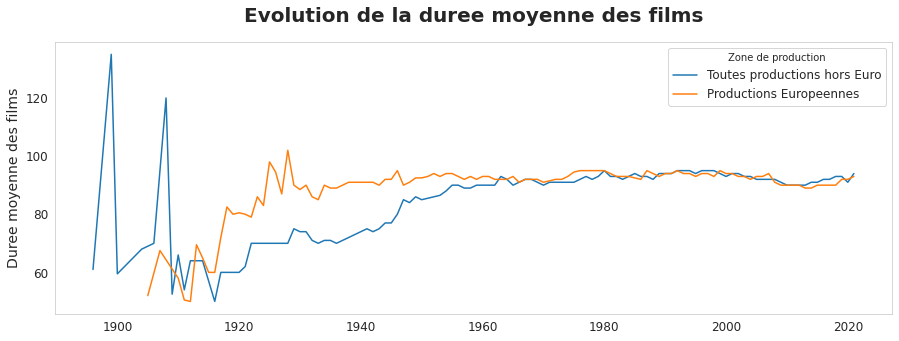

In [ ]:
#@title
# Evolution de la duree moyenne des films

## NOTE : Rajouter un titre, changer X et Y
## Slider pour montrer qu'au dela de 1950

fig,axs=plt.subplots(figsize=(15,5))

sns.lineplot(x=mean_runtime_by_year2['startYear'], y=mean_runtime_by_year2['runtimeMinutes'],label="Toutes productions hors Euro")
sns.lineplot(x=mean_runtime_by_yeareuro['startYear'], y=mean_runtime_by_yeareuro['runtimeMinutes'],label='Productions Europeennes')
plt.title('Evolution de la duree moyenne des films', weight = 'bold', fontsize = 20, pad = 20)
plt.xlabel('')
plt.ylabel('Duree moyenne des films', fontsize = 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12 )
plt.legend(title = 'Zone de production', fontsize = 12)
plt.grid()

plt.show()

## LES FILMS LES PLUS POPULAIRES

In [ ]:
#@title
# SCRIPT 

most_voted_all = db_all.nlargest(10, 'numVotes')
most_voted_all_euro = db_europe.nlargest(10, 'numVotes')

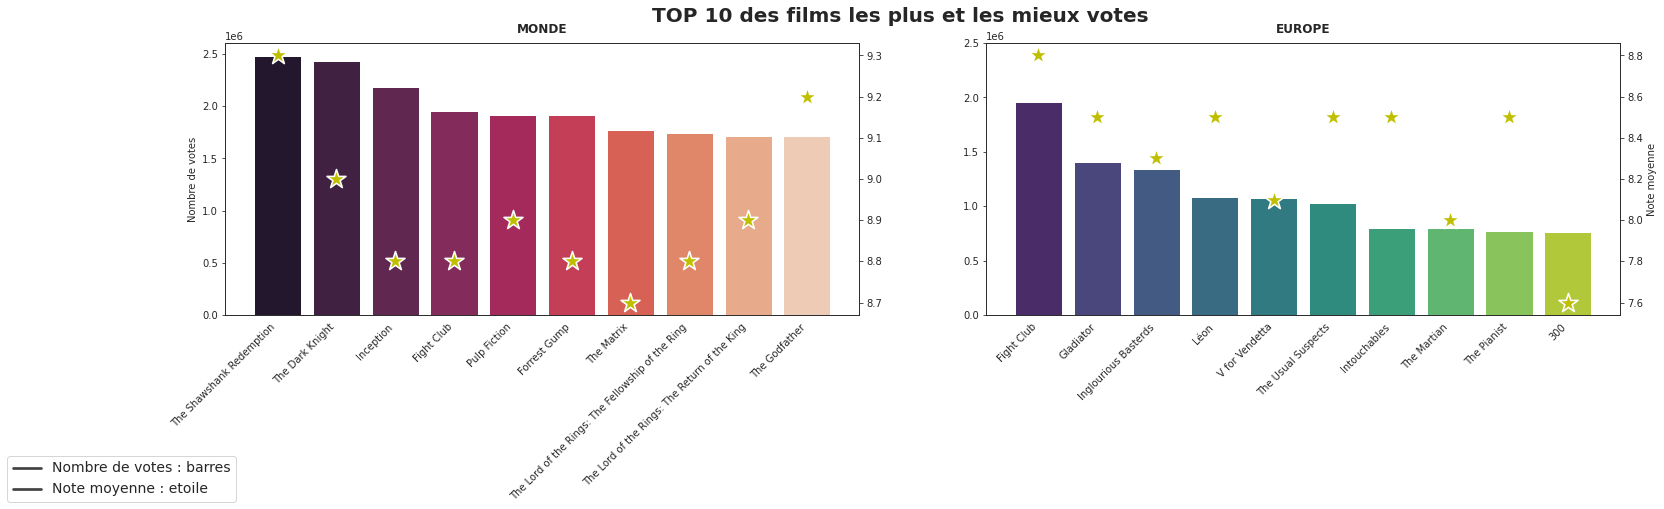

In [ ]:
#@title
# GRAPH

# changer l ordre X et Y 
fig,ax=plt.subplots(figsize=(25,5))

sns.set_style("white")

#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')


#Subplot WORLD
ax1 = plt.subplot(121)
sns.barplot(x=most_voted_all['originalTitle']
            ,y=most_voted_all['numVotes']
            , palette='rocket'
            )
ax1.set_title("MONDE", weight = "bold", pad = 10)
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
ax1.set_xlabel('')
ax1.set_ylabel('Nombre de votes')
ax2 = ax1.twinx()
ax2 = sns.scatterplot(x = most_voted_all["originalTitle"]
                      , y = most_voted_all["averageRating"]
                      , color = "y", marker = "*", s=400)
ax2.set_ylabel('')

# subplot EUROPE
ax3 = plt.subplot(122)
ax3=sns.barplot(x=most_voted_all_euro['originalTitle']
                ,y=most_voted_all_euro['numVotes']
                , palette='viridis')
ax3.set_title("EUROPE", weight = "bold", pad = 10)
ax3.set_xticklabels(ax3.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
ax3.set_ylim(0,2500000)
ax3.set_xlabel('')
ax3.set_ylabel('')

ax4 = ax3.twinx()
ax4= sns.scatterplot(x = most_voted_all_euro["originalTitle"]
                     , y = most_voted_all_euro["averageRating"]
                     , color = "y"
                     , marker = "*", s=400)
ax4.set_ylabel('Note moyenne')

fig.suptitle ('TOP 10 des films les plus et les mieux votes', weight = 'bold', fontsize = 20)
#fig.text(0.5, 0.04, 'Nombres de vote (en millions)', ha='center', weight = "bold", fontsize = 15)
#fig.text(0.04, 0.5, 'Genres', va='center', rotation='horizontal', weight = "bold", fontsize = 15)
#fig.tight_layout(pad = 5)
fig.legend(labels = ['Nombre de votes : barres', 'Note moyenne : etoile'], fontsize = 14, loc=3)
plt.show()

## LES GENRES

In [ ]:
#@title
# SCRIPT

#Graphique pour afficher les genres les plus votés (groupe) 

most_voted_Monde = db_all.groupby([db_all['genres'].apply(', '.join)]).sum()
most_voted_geners_euro = db_europe.groupby([db_europe['genres'].apply(', '.join)]).sum()
most_voted_Monde= most_voted_Monde.reset_index()
most_voted_MondeL = most_voted_Monde.nlargest(10, 'numVotes')
most_voted_geners_euro= most_voted_geners_euro.reset_index()
most_voted_geners_euro = most_voted_geners_euro.nlargest(10, 'numVotes')

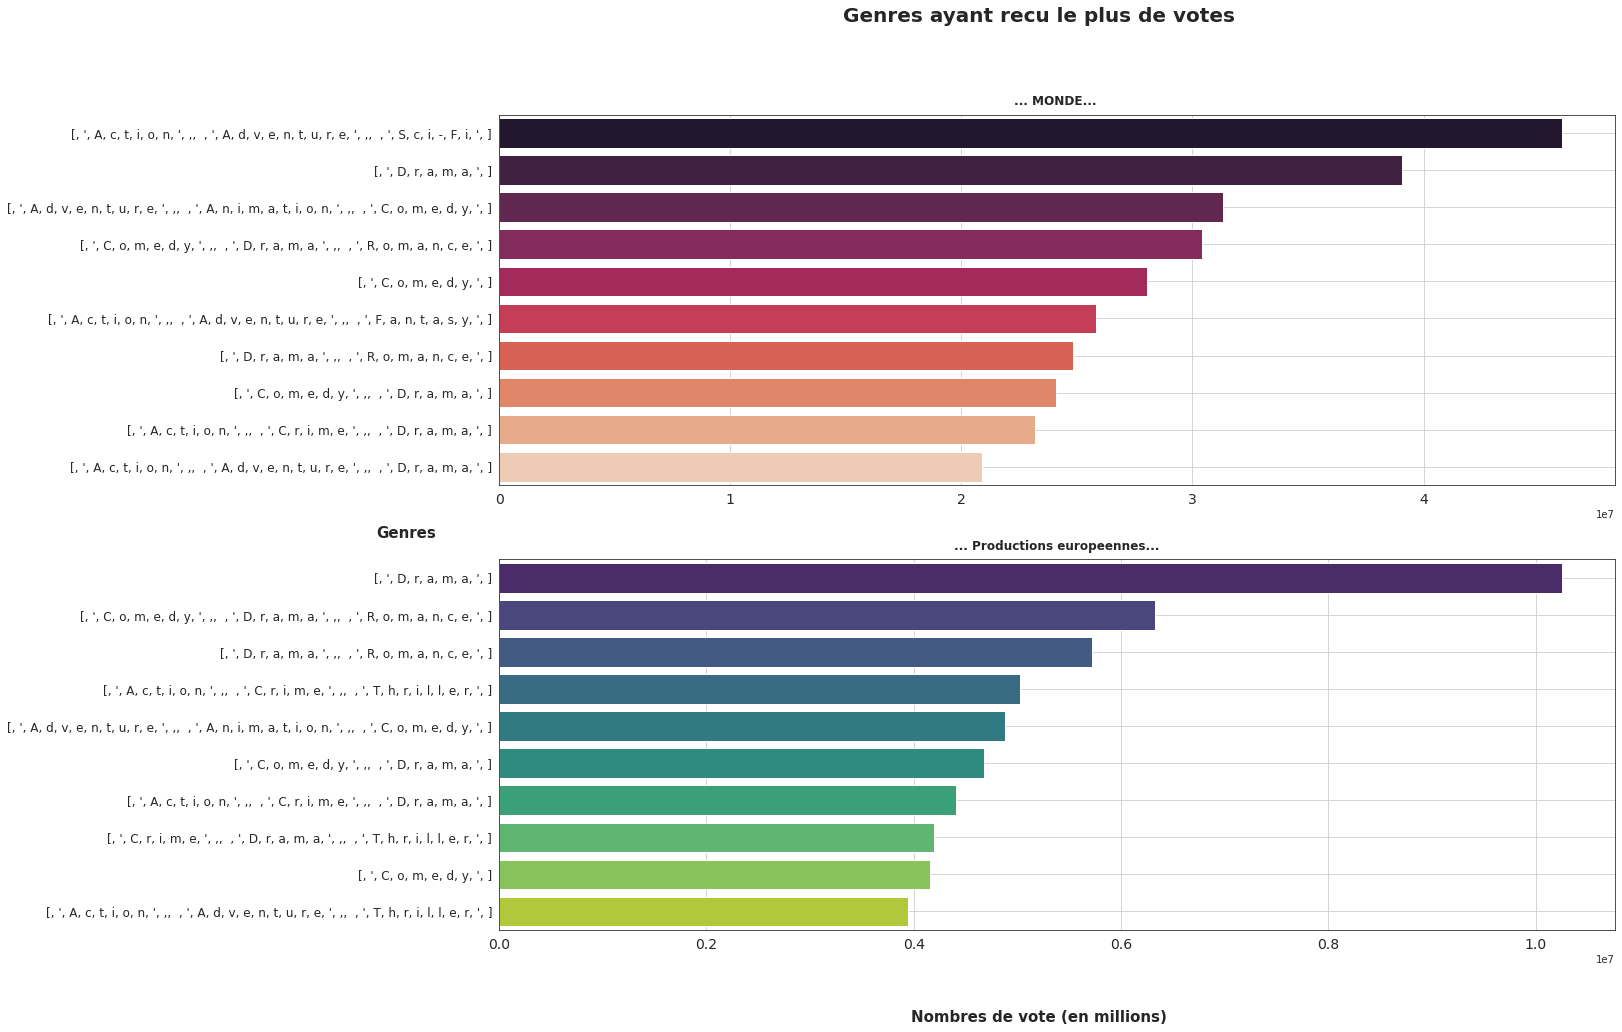

In [ ]:
#@title
# GRAPH
## NOTE : Faire un tri par note, ajout legende, lignes directrices

fig , axs = plt.subplots(figsize=(20,15), sharex =True, sharey = True)


# MONDE
ax1 = plt.subplot(211) 
ax1 = sns.barplot(x=most_voted_MondeL['numVotes'],y=most_voted_MondeL['genres'], palette='rocket')
ax1.set_title("... MONDE... ", weight = "bold", pad = 10)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid()
    
# EUROPE UNIQUEMENT
ax2 = plt.subplot(212)
ax2 = sns.barplot(x=most_voted_geners_euro['numVotes'],y=most_voted_geners_euro['genres'], palette='viridis')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
ax2.set_title("... Productions europeennes...", weight = "bold", pad = 10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid()

fig.suptitle('Genres ayant recu le plus de votes', fontsize = 20, weight = 'bold')
fig.text(0.5, 0.04, 'Nombres de vote (en millions)', ha='center', weight = "bold", fontsize = 15)
fig.text(0.04, 0.5, 'Genres', va='top', rotation='horizontal', weight = "bold", fontsize = 15)


plt.show()

## LES ACTEURS

In [ ]:
#@title
df_act_all = pd.read_csv('/content/drive/MyDrive/Projet-recommendations-Movies/db_actors_exploded_3.csv')

In [ ]:
#@title
# script création dataframe avec infos nécessaires pour graph "les 15 acteurs les plus présents par décennie dans la base globale"

q_act_all = pd.pivot_table(df_act_all, index = ['primaryName', 'gender', 'european_countries']
                              , aggfunc = 'count'
                              , values = ['tconst'], dropna = True)

In [ ]:
#@title
q_act_all = q_act_all.reset_index()
q_act_all = q_act_all.sort_values('tconst', ascending = False)

In [ ]:
#@title
#q_act_all.head(15)

In [ ]:
#@title
mask_europe = q_act_all[q_act_all['european_countries'] == 1]
mask_not_europe = q_act_all[q_act_all['european_countries'] == 0]

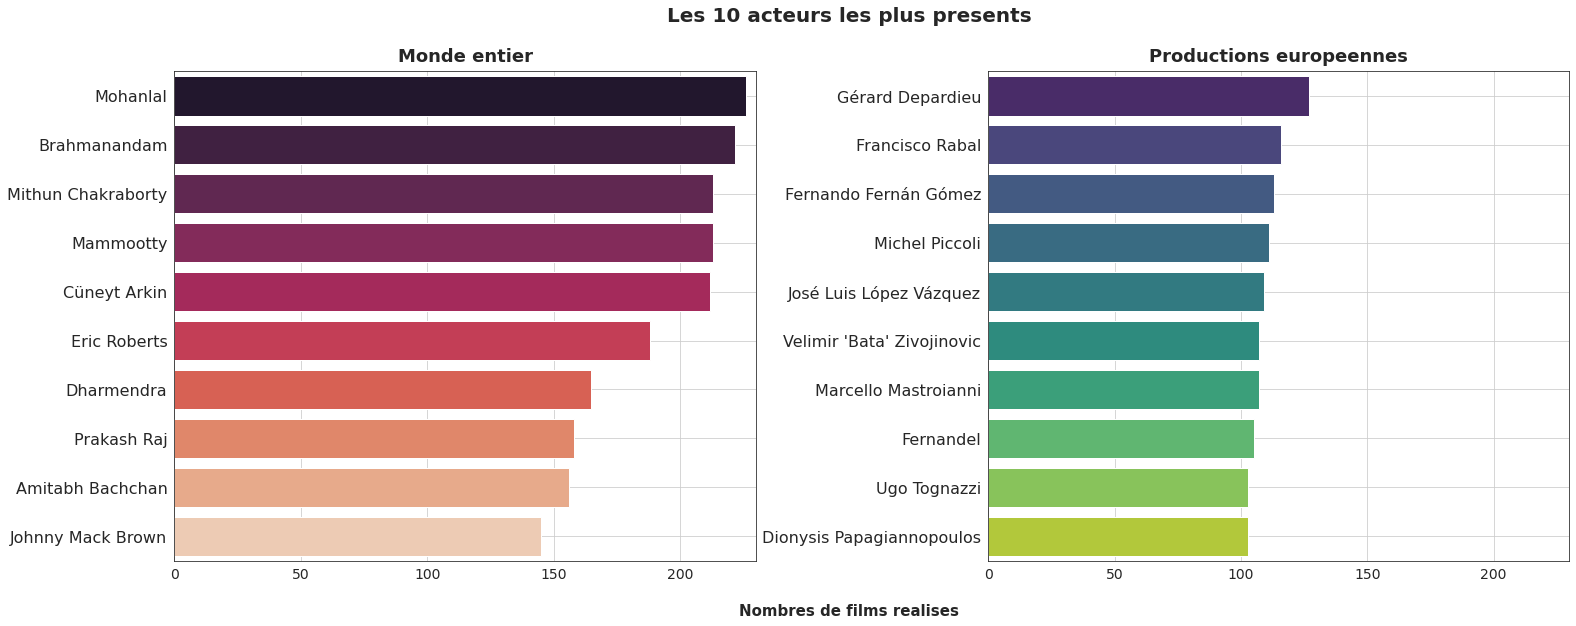

In [ ]:
#@title
# GRAPH  - script pour le graph correspondant - 10 acteurs les plus productifs - database globale + Europe


fig , axs = plt.subplots(nrows = 2 , ncols = 1, figsize=(25,9), sharex =True, sharey = True)

# Graph - all
fig1 = plt.subplot(121)
sns.barplot(data = q_act_all[0:10]
            , x = "tconst"
            , y = "primaryName"
#            , hue = 'gender'
            , palette='rocket')
fig1.set_title("Monde entier", weight = 'bold', pad = 10, fontsize = 18)
plt.xticks(fontsize = 14)
fig1.set_yticklabels(fig1.get_yticklabels() 
#                          ,rotation=-10 
                          ,horizontalalignment='right'
                          ,fontsize = 16)
fig1.set_ylabel('')
fig1.set_xlabel('')
fig1.set_xlim(0,230)
fig1.grid()

# Graph - Europe
fig2 = plt.subplot(122)
sns.barplot(data = mask_europe[0:10]
            , x = "tconst"
            , y = "primaryName"
#            , hue = 'gender'
            , palette='viridis'
            )
fig2.set_title("Productions europeennes", weight = 'bold', pad = 10, fontsize = 18)
fig2.set_yticklabels(fig2.get_yticklabels() 
#                          , rotation=-10 
                          , horizontalalignment='right'
                          , fontsize = 16
                           )
plt.xticks(fontsize = 14)
fig2.set_ylabel('')
fig2.set_xlabel('')
fig2.set_xlim(0,230)
fig2.grid()

fig.suptitle ('Les 10 acteurs les plus presents', weight = 'bold', fontsize = 20)
fig.text(0.5, 0.04, 'Nombres de films realises', ha='center', weight = "bold", fontsize = 15)
#fig.text(0.04, 0.5, 'Acteurs', va='top', rotation='horizontal', weight = "bold", fontsize = 15)
plt.subplots_adjust(wspace=0.4)

plt.show()

## ACTORS / DECADE

In [ ]:
#@title
# SCRIPT

# creating a pivot table - sur df all

q_act_dec = pd.pivot_table(df_act_all, index = ['decade', 'primaryName', 'gender', 'european_countries']
                              , aggfunc = 'count'
                              , values = ['tconst'], dropna = True)

In [ ]:
# Evolution des acteurs et actrices suivant les années (Simulation)
my_raceplot = barplot(q_act_dec,  item_column='primaryName', value_column='tconst', time_column='decade')
my_raceplot.plot(item_label = 'Acteurs et actrices', value_label = 'Nombre de films', frame_duration = 600)

In [ ]:
#@title
q_act_dec = q_act_dec.reset_index()
q_act_dec.decade = pd.to_numeric(q_act_dec.decade, errors='coerce').convert_dtypes()
q_act_dec = q_act_dec.sort_values('tconst', ascending = False)
#q_act_dec.head()

In [ ]:
#@title
q_eur_act_dec = q_act_dec.loc[q_act_dec['european_countries'] == 1] 

In [ ]:
#@title
# MASKS

mask_fig_dec = q_act_dec.loc[q_act_dec.decade > 2000]
mask_fig_dec = mask_fig_dec.sort_values(by= ['tconst'], ascending = False)
#mask_fig_dec

mask_fig_eur_dec = q_eur_act_dec.loc[q_eur_act_dec.decade > 2000]
mask_fig_eur_dec = mask_fig_eur_dec.sort_values(by= ['tconst'], ascending = False)
#mask_fig_eur_dec

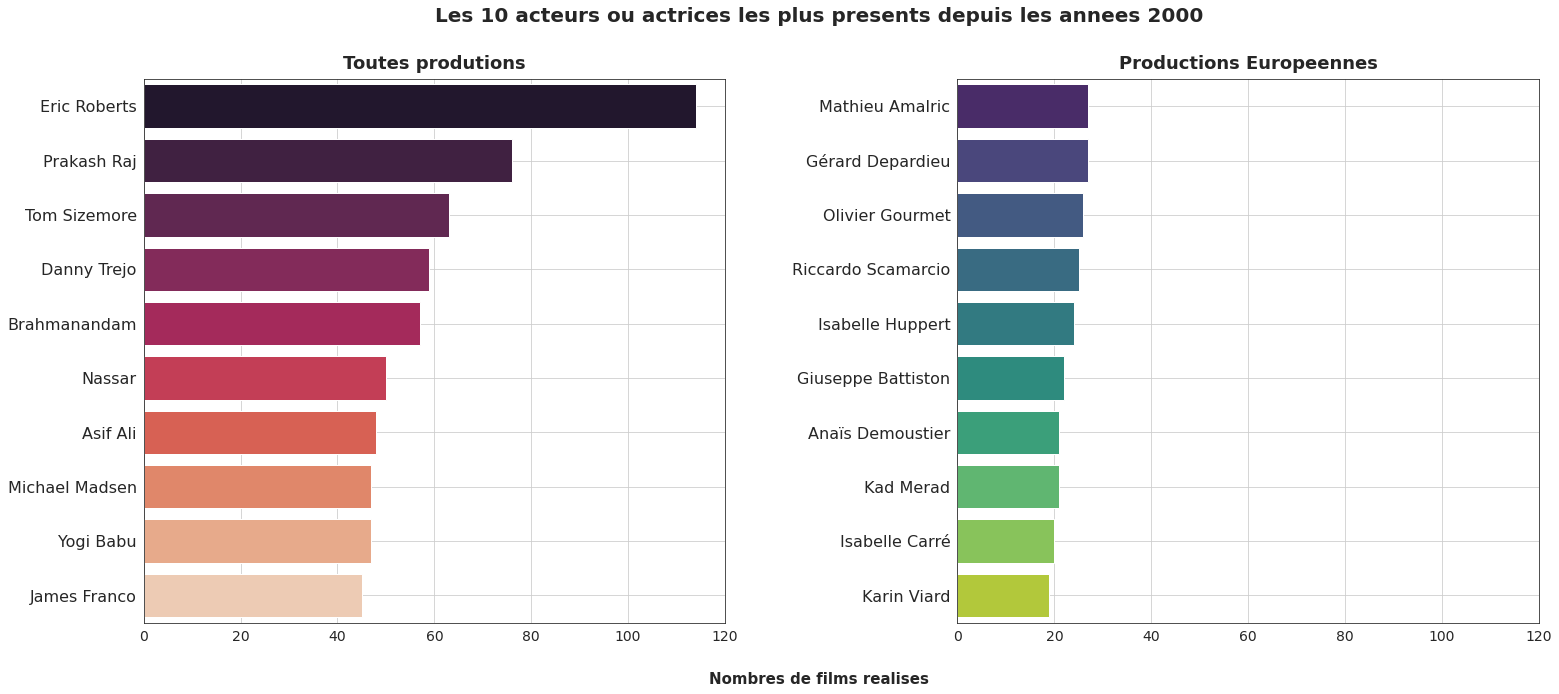

In [ ]:
#@title
# WORLD + EUR

### Manque encore une echelle sur l'axe des X
fig, axs = plt.subplots(nrows = 1 , ncols = 2, figsize=(25,10))


# Fig1 - Graph - Acteurs les plus presents a l'ecran depuis 2000 - WORLD
fig1 = plt.subplot(121)
sns.barplot(data = mask_fig_dec[0:10]
            , x = "tconst"
            , y = "primaryName"
#           , hue = 'gender'
            , palette='rocket')
fig1.set_title("Toutes produtions", weight = 'bold', fontsize = 18, pad = 10)

plt.xticks(fontsize = 14)

fig1.set_yticklabels(fig1.get_yticklabels(), 
                          horizontalalignment='right'
                          , fontsize = 16)
fig1.set_xlim(0,120)
fig1.set_xlabel('')
fig1.set_ylabel('')
fig1.grid()

# Fig 2 - EUROPE
fig2 = plt.subplot(122)
sns.barplot(data = mask_fig_eur_dec[0:10]
            , x = "tconst"
            , y = "primaryName"
#           , hue = 'gender'
            , palette='viridis')
fig2.set_title("Productions Europeennes", weight = 'bold', fontsize = 18, pad = 10)

plt.xticks(fontsize = 14)

fig2.set_yticklabels(fig2.get_yticklabels(), 
#                          rotation=45, 
                          horizontalalignment='right'
                          , fontsize = 16)
fig2.set_xlim(0,120)
fig2.set_xlabel('')
fig2.set_ylabel('')
fig2.grid()

fig.suptitle ('Les 10 acteurs ou actrices les plus presents depuis les annees 2000', weight = 'bold' , fontsize = 20)
fig.text(0.5, 0.04, 'Nombres de films realises', ha='center', weight = "bold", fontsize = 15)
#fig.text(0.04, 0.5, 'Acteurs', va='top', rotation='horizontal', weight = "bold", fontsize = 15)
plt.subplots_adjust(wspace=0.4)

plt.show()

INFOS ADDITIONNELLES

In [ ]:
#@title
# Filter on 'numVotes' and 'averageRating'

mask1= (db_europe['averageRating'] >= 6.3)
mask2= (db_europe['numVotes'] >= 2769)
#mask3 = (db_europe['startYear'] >= )
db_europe_rec = db_europe.loc[(mask1)&(mask2)]

In [ ]:
#@title
# SCRIPT - Distribution on 'averageRating' and 'numVotes'

ratings = dict(mean=db_europe_rec.averageRating.mean(),
              median=db_europe_rec.averageRating.median())
votes = dict(mean=db_europe_rec.numVotes.mean(),
              median=db_europe_rec.numVotes.median())

In [ ]:
#@title
# SCRIPT - Distribution on 'averageRating' and 'numVotes'

ratings = dict(mean=db_europe.averageRating.mean(),
              median=db_europe.averageRating.median())
votes = dict(mean=db_europe.numVotes.mean(),
              median=db_europe.numVotes.median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is d

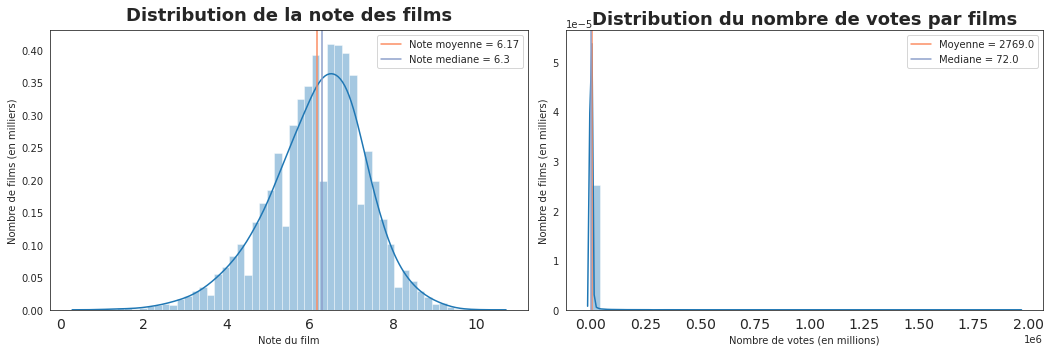

In [ ]:
#@title
# GRAPH - Distribution on 'averageRating' and 'numVotes'
##  Note : Revoir labels, X et Y, etc...

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(db_europe.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"Note moyenne = {round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"Note mediane = {round(ratings['median'],2)}")
ax1.set_title("Distribution de la note des films", weight = 'bold', pad = 10, fontsize = 18)
plt.xticks(fontsize = 14)
ax1.set_xlabel('Note du film')
ax1.set_ylabel('Nombre de films (en milliers)')
plt.legend()

plt.subplot(1,2,2)
ax2 = sns.distplot(db_europe.numVotes,kde_kws=dict(bw=0.2))
ax2.axvline(x=votes["mean"],c=sns.color_palette("Set2")[1],label=f"Moyenne = {round(votes['mean'],0)}")
ax2.axvline(x=votes["median"],c=sns.color_palette("Set2")[2],label=f"Mediane = {round(votes['median'],0)}")
ax2.set_title ('Distribution du nombre de votes par films', weight = 'bold', fontsize = 18)
plt.xticks(fontsize = 14)
ax2.set_xlabel('Nombre de votes (en millions)')
ax2.set_ylabel('Nombre de films (en milliers)')
plt.legend()

plt.tight_layout()

plt.show()